# Binary Classification in Oil Industry

### What is a Choke Cut?

A **choke cut** is a controlled reduction of flow from a well by adjusting the choke valve. This process is used to manage wellbore pressure, regulate production rates, and prevent formation damage. By gradually restricting the flow, operators can safely bring a well under control, minimize pressure surges, and reduce the risk of equipment failure or blowouts.

Choke cuts are typically performed during well start-up, testing, or when changing production conditions. The procedure involves incrementally closing the choke valve to achieve the desired flow rate and pressure, while closely monitoring well parameters to ensure safe and stable operations.

If a choke cut is not performed correctly, several safety hazards may arise:

- **Well Blowouts:** Improper choke management can lead to uncontrolled flow, increasing the risk of blowouts, which are dangerous and can cause loss of life, equipment, and environmental damage.
- **Equipment Failure:** Excessive flow rates may exceed equipment design limits, leading to valve or pipeline ruptures.
- **Formation Damage:** Incorrect choke settings can cause rapid pressure drops, resulting in sand production or water coning, which may damage the wellbore and surface facilities.
- **Fire and Explosion:** Uncontrolled hydrocarbon release increases the risk of fire or explosion, especially in the presence of ignition sources.
- **Environmental Pollution:** Spills or leaks due to poor choke control can contaminate soil and water, leading to regulatory penalties and cleanup costs.

Proper choke management is essential to maintain safe operations and protect personnel, equipment, and the environment.

| Well Rig                                   | Well Bore Sketch                           | Choke Cut Illustration                      |
|---------------------------------------------|--------------------------------------------|---------------------------------------------|
| ![Well Rig](Images/WellRig.jpg)            | ![Well Bore Sketch](Images/WellBoreSketch.png)  | ![Choke Cut](Images/ChokeCut.jpeg)          |

Dataset shape: (10, 11)

Column names:
['wellhead_pressure_psi', 'casing_pressure_psi', 'flow_rate_bpm', 'mud_weight_ppg', 'drilling_depth_ft', 'gas_oil_ratio', 'temperature_fahrenheit', 'choke_size_current', 'pump_pressure_psi', 'bit_rpm', 'choke_cut_needed']

First few rows:


,wellhead_pressure_psi,casing_pressure_psi,flow_rate_bpm,mud_weight_ppg,drilling_depth_ft,gas_oil_ratio,temperature_fahrenheit,choke_size_current,pump_pressure_psi,bit_rpm,choke_cut_needed
0,2500,1800,450,12.5,8500,850,185,32,3200,120,1
1,1200,800,320,10.2,5200,420,145,48,2100,95,0
2,3100,2200,520,14.8,12000,1200,220,24,4500,85,1
3,1800,1100,380,11.5,7200,650,165,40,2800,110,0
4,2800,2000,480,13.2,9800,950,195,28,3800,100,1



Dataset statistics:


,wellhead_pressure_psi,casing_pressure_psi,flow_rate_bpm,mud_weight_ppg,drilling_depth_ft,gas_oil_ratio,temperature_fahrenheit,choke_size_current,pump_pressure_psi,bit_rpm,choke_cut_needed
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000
mean,2260.000000,1565.000000,427.000000,12.410000,8640.000000,804.000000,182.00000,35.000000,3300.00000,102.500000,0.500000
std,834.266145,657.457223,96.384646,1.918014,3224.282866,376.746304,36.60601,10.801234,1103.52969,16.873714,0.527046
min,1100.000000,650.000000,280.000000,9.800000,4200.000000,320.000000,125.00000,20.000000,1800.00000,75.000000,0.000000
25%,1575.000000,950.000000,350.000000,10.975000,6300.000000,477.500000,157.50000,26.500000,2500.00000,91.250000,0.000000
50%,2350.000000,1700.000000,435.000000,12.250000,8250.000000,785.000000,180.00000,34.000000,3100.00000,102.500000,0.500000
75%,2875.000000,2075.000000,495.000000,13.650000,10700.000000,1062.500000,206.25000,43.000000,4100.00000,113.750000,1.000000
max,3500.000000,2500.000000,580.000000,15.500000,14500.000000,1450.000000,245.00000,52.000000,5200.00000,130.000000,1.000000


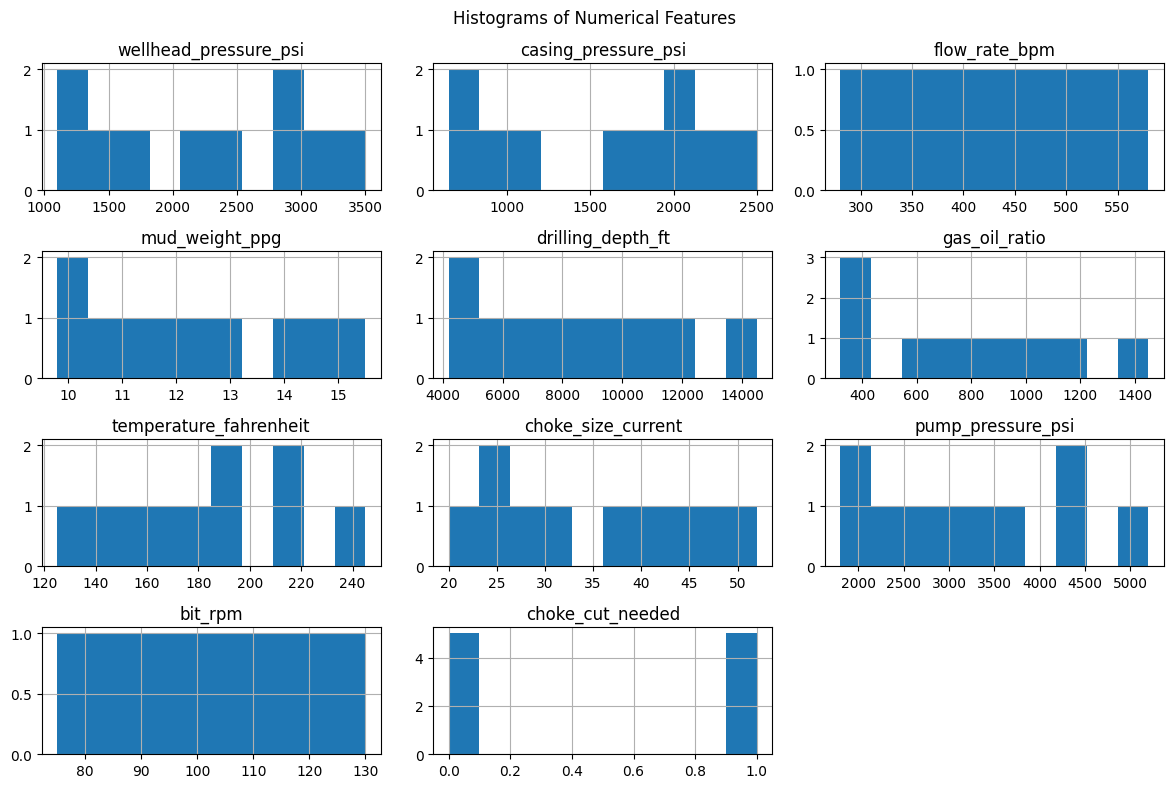

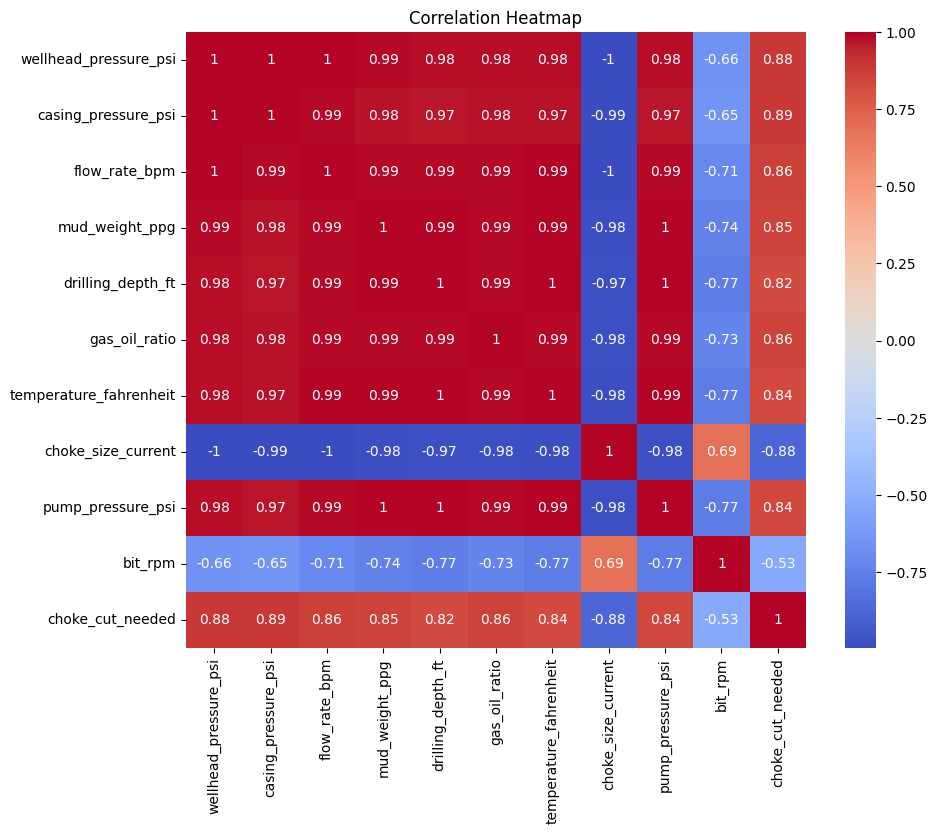


Target variable distribution:
No choke cut needed (0): 5 samples
Choke cut needed (1): 5 samples


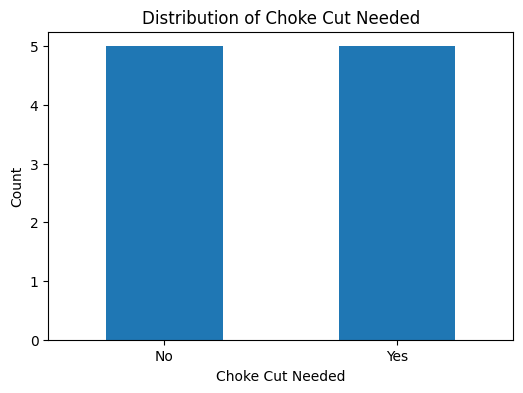

In [5]:
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt

# Read the dataset properly
with open('data/choke_cut_dataset.json', 'r') as f:
    dataset = json.load(f)

# Convert the data to DataFrame
df_choke = pd.DataFrame(dataset['data'])

# Display basic info
print("Dataset shape:", df_choke.shape)
print("\nColumn names:")
print(df_choke.columns.tolist())
print("\nFirst few rows:")
display(df_choke.head())
print("\nDataset statistics:")
display(df_choke.describe())

# Plot histograms for numerical columns
df_choke.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

# Plot correlation heatmap if there are multiple numerical columns
if df_choke.select_dtypes(include='number').shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_choke.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

# Display target variable distribution
target_counts = df_choke['choke_cut_needed'].value_counts()
print(f"\nTarget variable distribution:")
print(f"No choke cut needed (0): {target_counts[0]} samples")
print(f"Choke cut needed (1): {target_counts[1]} samples")

# Plot target distribution
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar')
plt.title('Distribution of Choke Cut Needed')
plt.xlabel('Choke Cut Needed')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Prepare features and target
X = df_choke.drop('choke_cut_needed', axis=1)
y = df_choke['choke_cut_needed']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=4, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/50


/Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/module1_dl_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6250 - loss: 0.6967 - val_accuracy: 0.0000e+00 - val_loss: 1.0446
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6250 - loss: 0.6967 - val_accuracy: 0.0000e+00 - val_loss: 1.0446
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6387 - val_accuracy: 0.0000e+00 - val_loss: 0.9841
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.6387 - val_accuracy: 0.0000e+00 - val_loss: 0.9841
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.5954 - val_accuracy: 0.0000e+00 - val_loss: 0.9298
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 0.5954 - val_accuracy: 0.0000e+00 - val_loss: 0.9298
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 0.5493 - val_accuracy: 0.0000e+00 - val_loss: 0.8819
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 0.5493 - val_accuracy: 0.0000e+0

In [8]:
# Predict choke cut outcome on the test set
y_pred_prob = model.predict(X_test_scaled)
print("y_pred_prob:", y_pred_prob)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("Predicted probabilities:", y_pred_prob.flatten())
print("Predicted outcomes:", y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
y_pred_prob: [[0.4533343 ]
 [0.05846858]]
Predicted probabilities: [0.4533343  0.05846858]
Predicted outcomes: [0 0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
y_pred_prob: [[0.4533343 ]
 [0.05846858]]
Predicted probabilities: [0.4533343  0.05846858]
Predicted outcomes: [0 0]


In [9]:
# Explanation of the output

# y_pred_prob contains the predicted probabilities from the model for each sample in X_test_scaled.
# Each value is between 0 and 1, representing the model's confidence that a choke cut is needed (1).
# For example, 0.453 means the model predicts a 45.3% chance that a choke cut is needed.

# y_pred is the binary prediction, where values > 0.5 are classified as 1 (choke cut needed), otherwise 0.
# In this case, both predictions are 0, meaning the model predicts no choke cut is needed for both test samples.

# y_test contains the actual labels for the test set, which are both 0 (no choke cut needed).
# This means the model's predictions match the true labels for these samples.

print("y_pred_prob:", y_pred_prob)
print("y_pred:", y_pred)
print("y_test:", y_test.values)

y_pred_prob: [[0.4533343 ]
 [0.05846858]]
y_pred: [0 0]
y_test: [0 0]


# Regression in Oil Industry

### Drilling Cost Regression Use Case

The `drilling_cost_regression.json` file in the `data` folder typically contains a dataset designed for a regression task in the oil and gas industry. The main use case is to **predict the total drilling cost** for a well based on various operational and geological parameters.

#### Typical Use Case Description

- **Objective:** Estimate the total cost of drilling a well using input features such as well depth, mud weight, drilling time, rig type, formation type, and other relevant variables.
- **Business Value:** Accurate cost prediction helps operators with budgeting, project planning, risk assessment, and optimizing drilling strategies to minimize expenses.
- **Target Variable:** The target is a continuous variable representing the total drilling cost (often in USD).
- **Features:** Common features may include:
    - Well depth (ft or m)
    - Drilling time (days)
    - Mud weight (ppg)
    - Rig horsepower
    - Formation type
    - Number of casing strings
    - Bit type
    - Location or region

#### Example Use Case

> Given a set of drilling parameters and well characteristics, predict the expected drilling cost to support financial planning and operational decision-making in oilfield development.

This regression approach enables data-driven cost management and supports more efficient drilling operations.

Drilling cost regression dataset shape: (15, 11)

Columns: ['planned_depth_ft', 'geological_complexity_score', 'location_accessibility_score', 'drilling_days_estimated', 'rig_day_rate_usd', 'mud_cost_per_bbl', 'casing_steel_cost_per_ft', 'environmental_restrictions_score', 'weather_risk_score', 'crew_experience_years', 'total_drilling_cost_usd']


,planned_depth_ft,geological_complexity_score,location_accessibility_score,drilling_days_estimated,rig_day_rate_usd,mud_cost_per_bbl,casing_steel_cost_per_ft,environmental_restrictions_score,weather_risk_score,crew_experience_years,total_drilling_cost_usd
0,8500,6,7,25,35000,85,45,4,3,8,1250000
1,12000,8,4,45,42000,120,55,7,6,12,2350000
2,5200,3,9,12,28000,65,35,2,2,6,485000
3,15000,9,3,65,50000,150,70,9,8,15,4200000
4,7800,5,8,20,32000,75,42,3,4,9,920000


,planned_depth_ft,geological_complexity_score,location_accessibility_score,drilling_days_estimated,rig_day_rate_usd,mud_cost_per_bbl,casing_steel_cost_per_ft,environmental_restrictions_score,weather_risk_score,crew_experience_years,total_drilling_cost_usd
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,10106.666667,6.333333,6.200000,35.133333,37933.333333,101.133333,50.733333,4.933333,4.800000,10.200000,1.957667e+06
std,3621.062722,2.288689,2.366432,20.223277,8655.854061,34.129725,13.365556,2.685056,2.366432,3.609511,1.467863e+06
min,4800.000000,2.000000,2.000000,10.000000,25000.000000,60.000000,32.000000,1.000000,1.000000,5.000000,3.850000e+05
25%,7500.000000,5.000000,4.500000,19.000000,31500.000000,73.500000,41.000000,3.000000,3.000000,8.000000,8.500000e+05
50%,9200.000000,6.000000,6.000000,28.000000,36000.000000,88.000000,47.000000,4.000000,5.000000,9.000000,1.420000e+06
75%,12750.000000,8.000000,8.000000,48.500000,43500.000000,127.500000,60.000000,6.500000,6.500000,12.500000,2.665000e+06
max,16500.000000,10.000000,10.000000,75.000000,55000.000000,165.000000,75.000000,10.000000,9.000000,18.000000,5.250000e+06


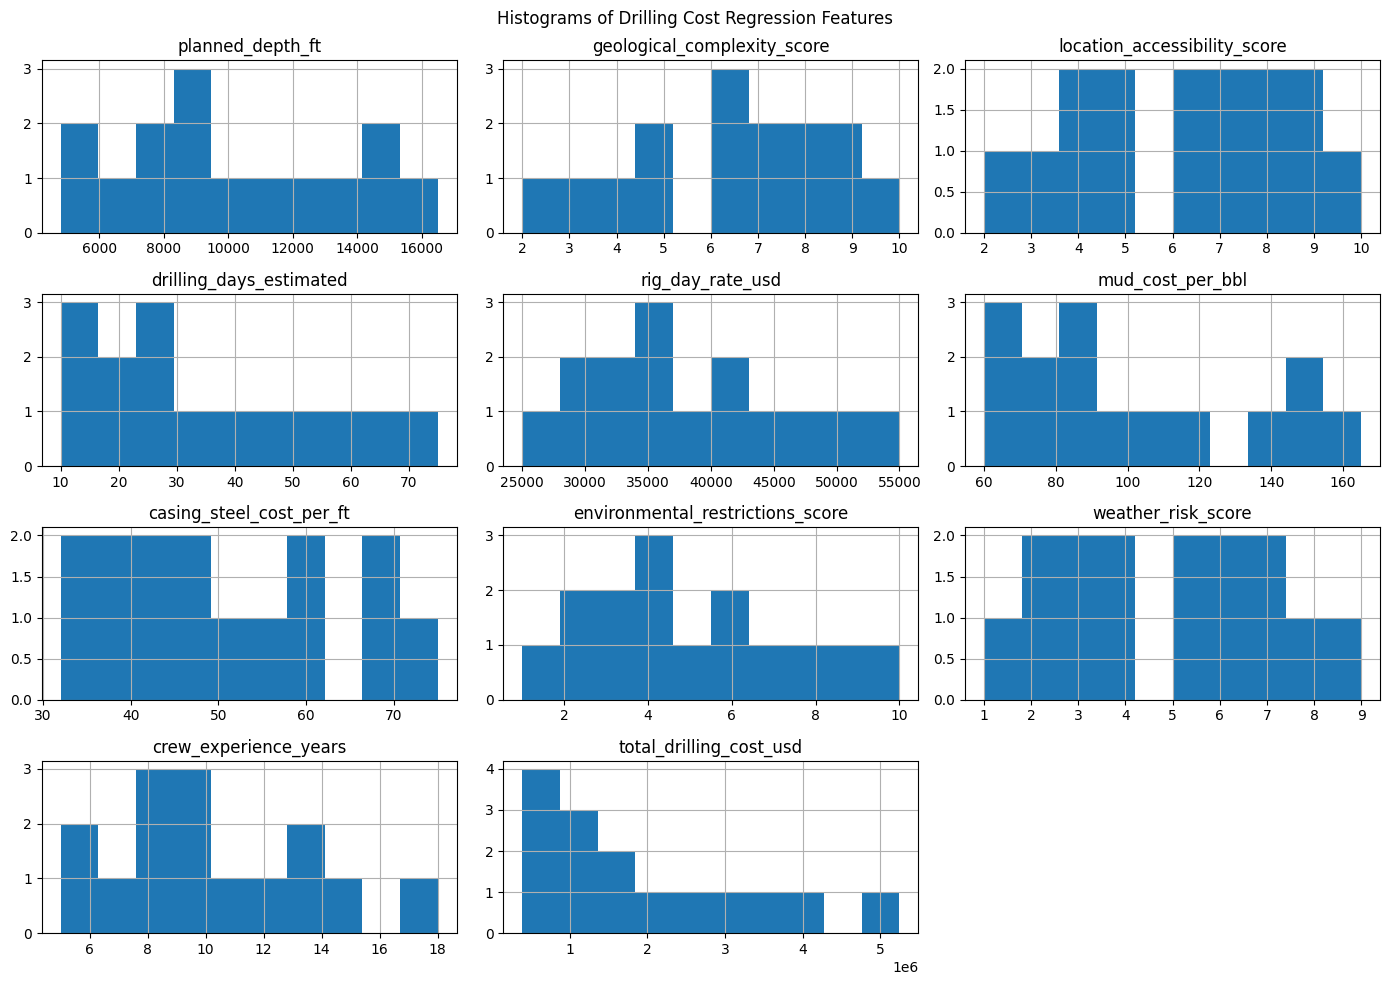

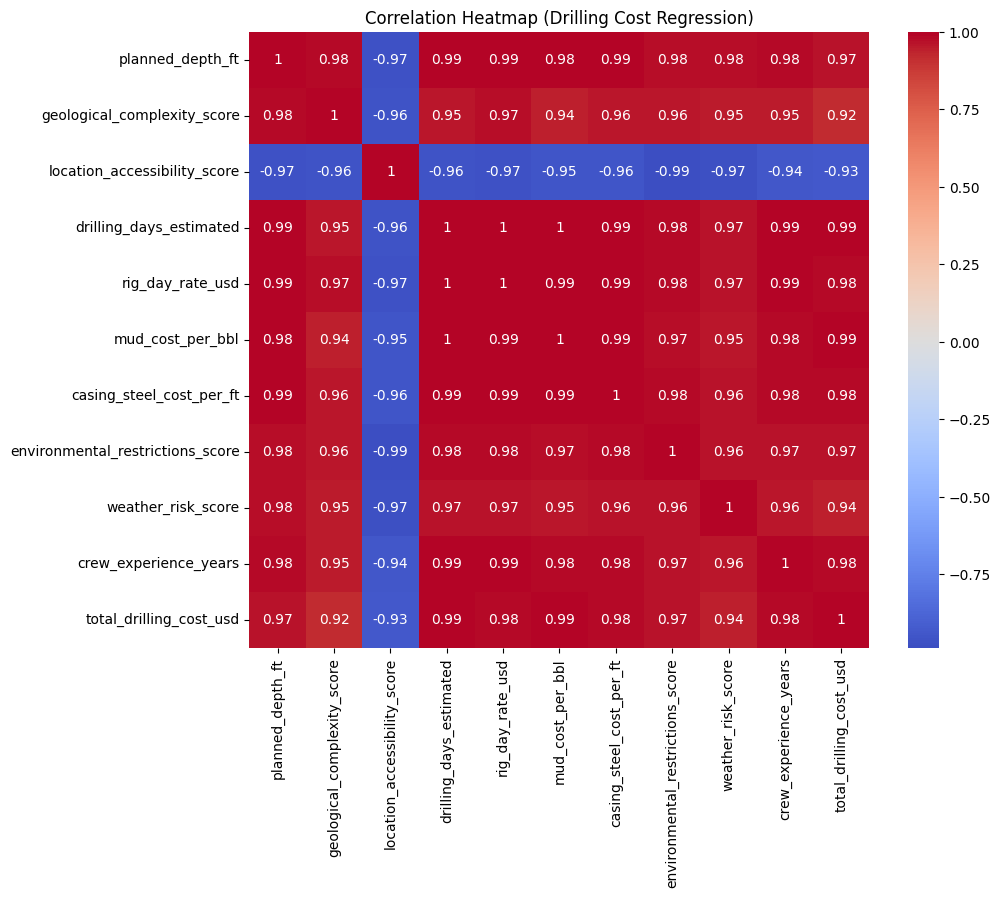

In [10]:
# Load and visualize the drilling cost regression dataset
with open('data/drilling_cost_regression.json', 'r') as f:
    drilling_data = json.load(f)

df_drilling = pd.DataFrame(drilling_data['data'])

# Display basic info
print("Drilling cost regression dataset shape:", df_drilling.shape)
print("\nColumns:", df_drilling.columns.tolist())
display(df_drilling.head())
display(df_drilling.describe())

# Plot histograms for numerical features
df_drilling.hist(figsize=(14, 10))
plt.suptitle('Histograms of Drilling Cost Regression Features')
plt.tight_layout()
plt.show()

# Correlation heatmap
num_cols = df_drilling.select_dtypes(include='number')
if num_cols.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Drilling Cost Regression)')
    plt.show()

# Scatter plots for top correlated features with target
target_col = 'drilling_cost'
if target_col in df_drilling.columns:
    corr = num_cols.corr()[target_col].abs().sort_values(ascending=False)
    top_features = corr.index[1:4]  # Exclude target itself
    for feat in top_features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df_drilling[feat], y=df_drilling[target_col])
        plt.title(f'{feat} vs Drilling Cost')
        plt.xlabel(feat)
        plt.ylabel('Drilling Cost')
        plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Prepare features and target
X_drill = df_drilling.drop('total_drilling_cost_usd', axis=1)
y_drill = df_drilling['total_drilling_cost_usd']

# Optionally log-transform the target for better regression performance
y_drill_log = np.log1p(y_drill)

# Split into train and test sets
X_drill_train, X_drill_test, y_drill_train, y_drill_test = train_test_split(
    X_drill, y_drill_log, test_size=0.2, random_state=42
)

# Standardize features for neural network training.
# Neural networks perform better when input features are scaled to have zero mean and unit variance.
scaler_drill = StandardScaler()
X_drill_train_scaled = scaler_drill.fit_transform(X_drill_train)
X_drill_test_scaled = scaler_drill.transform(X_drill_test)

# Build the neural network model
model_drill = Sequential([
    Dense(128, activation='relu', input_shape=(X_drill_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

model_drill.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_drill = model_drill.fit(
    X_drill_train_scaled, y_drill_train,
    epochs=100, batch_size=4,
    validation_data=(X_drill_test_scaled, y_drill_test),
    verbose=1
)

Epoch 1/100


/Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/module1_dl_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 198.6289 - mae: 14.0500 - val_loss: 177.1535 - val_mae: 13.3021
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 198.6289 - mae: 14.0500 - val_loss: 177.1535 - val_mae: 13.3021
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 188.0834 - mae: 13.6616 - val_loss: 170.9369 - val_mae: 13.0636
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 188.0834 - mae: 13.6616 - val_loss: 170.9369 - val_mae: 13.0636
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 180.6948 - mae: 13.3841 - val_loss: 164.0141 - val_mae: 12.7919
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 180.6948 - mae: 13.3841 - val_loss: 164.0141 - val_mae: 12.7919
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 172.4725 - mae: 13.0483 - val_loss: 157.3000 - val_mae: 12.5219
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 172.4725 - mae: 13.0483 - val_loss: 157.3000 - val_mae: 12.5219
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━

In [12]:
# Use the trained model_drill to predict on the scaled test set
y_drill_pred_log = model_drill.predict(X_drill_test_scaled)

# Convert predictions back to original scale (undo log1p)
y_drill_pred = np.expm1(y_drill_pred_log).flatten()

print("Predicted total drilling costs (USD):", y_drill_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted total drilling costs (USD): [156745.2  282532.88 311763.53]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicted total drilling costs (USD): [156745.2  282532.88 311763.53]


# MultiClass Classification - Cost of Care in Insurance

### Cost of Care in Insurance Companies

The **Cost of Care** refers to the total expenses incurred by insurance companies to provide medical services, treatments, and support to their policyholders. This includes payments for hospital stays, physician visits, medications, surgeries, diagnostic tests, rehabilitation, and other healthcare services covered under insurance plans.

#### Why Cost of Care Matters to Insurance Companies

- **Financial Sustainability:** Managing the cost of care is crucial for insurers to remain profitable. High or unpredictable costs can erode margins and threaten the company’s financial health.
- **Premium Calculation:** Insurers use historical and projected cost of care data to set premium rates. Accurate cost estimation ensures premiums are competitive yet sufficient to cover claims.
- **Risk Assessment:** Understanding cost drivers helps insurers assess risk profiles of individuals and groups, enabling better underwriting and risk pooling.
- **Claims Management:** Monitoring cost of care allows insurers to detect fraud, overutilization, or unnecessary procedures, leading to more efficient claims processing.
- **Provider Negotiations:** Insurers negotiate rates with healthcare providers. Insight into cost structures strengthens their bargaining position and helps control expenses.
- **Regulatory Compliance:** Many regions require insurers to justify their rates and demonstrate that a reasonable portion of premiums is spent on actual care (medical loss ratio requirements).
- **Customer Satisfaction:** Efficient cost management can lead to lower premiums and better coverage, improving customer retention and satisfaction.

#### Business Impact

- **Profitability:** Lowering the cost of care directly improves the insurer’s bottom line.
- **Competitive Advantage:** Companies that manage costs effectively can offer more attractive products.
- **Innovation:** Data-driven insights into cost of care can drive new care management programs, preventive health initiatives, and value-based care models.

#### Typical Cost of Care Components

| Component                | Description                                      |
|--------------------------|--------------------------------------------------|
| Hospitalization          | Inpatient and outpatient hospital services       |
| Physician Services       | Doctor visits, specialist consultations          |
| Prescription Drugs       | Medications covered under the plan               |
| Diagnostic Services      | Lab tests, imaging, screenings                   |
| Emergency Care           | ER visits and urgent care                        |
| Preventive Care          | Vaccinations, wellness checks                    |
| Long-term Care           | Rehabilitation, nursing, home health             |
| Administrative Expenses  | Claims processing, care coordination             |

Understanding and managing the cost of care is fundamental for insurance companies to ensure sustainability, regulatory compliance, and customer satisfaction in a competitive healthcare market.

Insurance cost classification dataset shape: (20, 11)

Columns: ['age', 'bmi', 'chronic_conditions_count', 'smoker', 'exercise_frequency_per_week', 'family_medical_history_score', 'occupation_risk_score', 'previous_claims_count', 'mental_health_score', 'medication_count', 'cost_category']


,age,bmi,chronic_conditions_count,smoker,exercise_frequency_per_week,family_medical_history_score,occupation_risk_score,previous_claims_count,mental_health_score,medication_count,cost_category
0,28,22.5,0,0,5,3,2,1,9,0,0
1,45,27.8,1,0,3,5,4,3,7,2,1
2,62,31.2,2,1,1,7,3,8,6,4,2
3,73,29.5,4,0,0,9,2,15,4,8,3
4,35,24.1,0,0,4,4,3,2,8,1,0


,age,bmi,chronic_conditions_count,smoker,exercise_frequency_per_week,family_medical_history_score,occupation_risk_score,previous_claims_count,mental_health_score,medication_count,cost_category
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,52.850000,27.380000,1.900000,0.35000,2.200000,6.150000,2.900000,8.350000,6.05000,4.500000,1.500000
std,17.918749,3.656803,1.774082,0.48936,1.935812,2.560325,1.410487,7.205809,2.21181,4.248839,1.147079
min,26.000000,20.900000,0.000000,0.00000,0.000000,2.000000,1.000000,0.000000,2.00000,0.000000,0.000000
25%,38.000000,24.850000,0.750000,0.00000,0.750000,4.000000,2.000000,2.750000,4.75000,1.000000,0.750000
50%,53.500000,27.800000,1.500000,0.00000,2.000000,6.500000,3.000000,7.000000,6.00000,3.500000,1.500000
75%,67.500000,29.650000,3.000000,1.00000,4.000000,8.000000,4.000000,12.500000,8.00000,6.250000,2.250000
max,81.000000,33.800000,6.000000,1.00000,6.000000,10.000000,6.000000,25.000000,10.00000,15.000000,3.000000


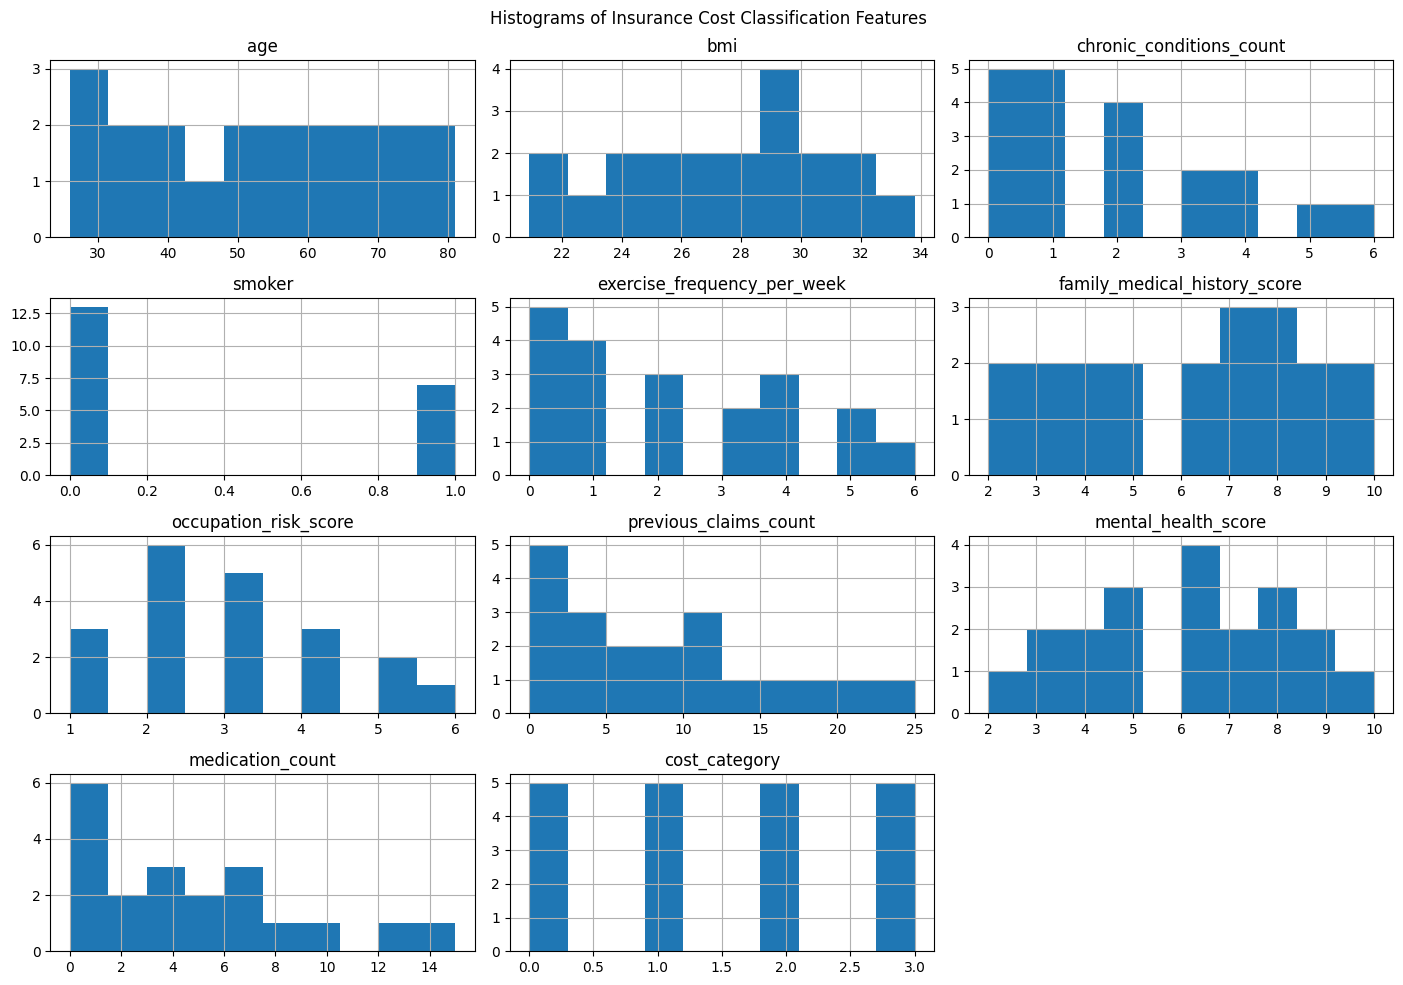

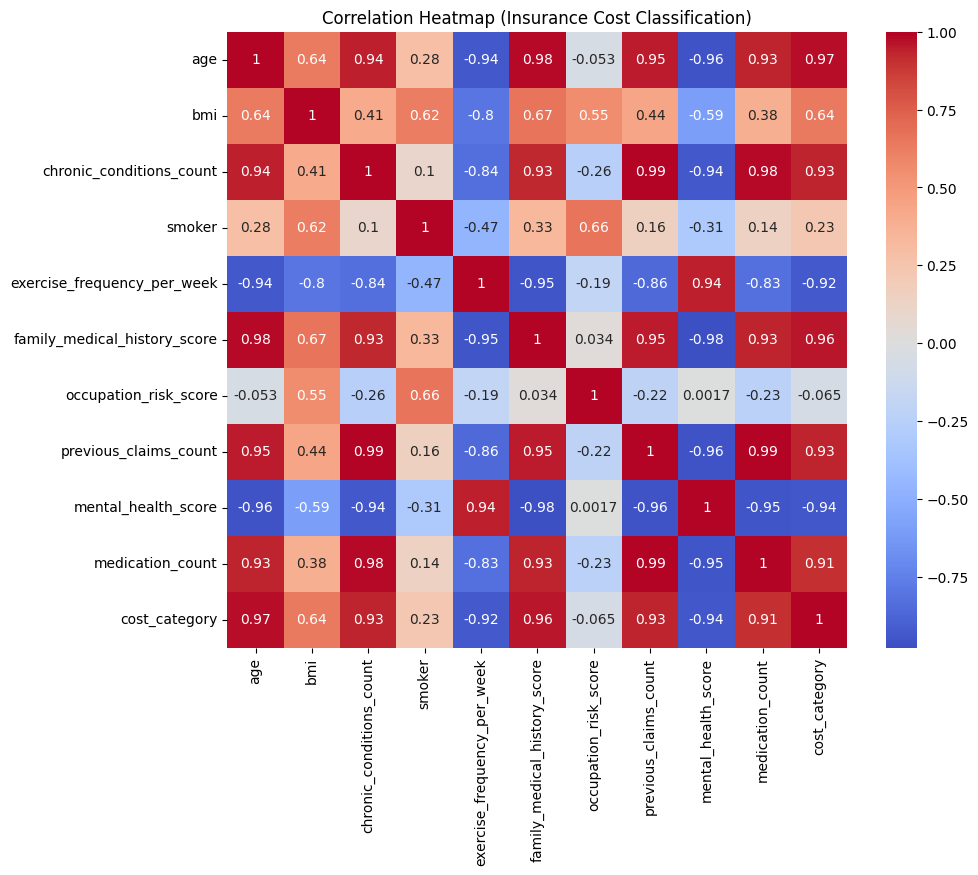

In [14]:
# Read and visualize the insurance cost classification dataset
with open('data/insurance_cost_classification.json', 'r') as f:
    insurance_data = json.load(f)

df_insurance = pd.DataFrame(insurance_data['data'])

# Display basic info
print("Insurance cost classification dataset shape:", df_insurance.shape)
print("\nColumns:", df_insurance.columns.tolist())
display(df_insurance.head())
display(df_insurance.describe())

# Plot histograms for numerical features
df_insurance.hist(figsize=(14, 10))
plt.suptitle('Histograms of Insurance Cost Classification Features')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical columns
num_cols_ins = df_insurance.select_dtypes(include='number')
if num_cols_ins.shape[1] > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(num_cols_ins.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap (Insurance Cost Classification)')
    plt.show()

# Plot target distribution if a target column exists (e.g., 'cost_class')
target_col_ins = [col for col in df_insurance.columns if 'class' in col or 'target' in col]
if target_col_ins:
    target_counts_ins = df_insurance[target_col_ins[0]].value_counts()
    plt.figure(figsize=(6, 4))
    target_counts_ins.plot(kind='bar')
    plt.title(f"Distribution of {target_col_ins[0]}")
    plt.xlabel(target_col_ins[0])
    plt.ylabel('Count')
    plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare features and target
X_ins = df_insurance.drop('cost_category', axis=1)
y_ins = df_insurance['cost_category']

# One-hot encode the target for multiclass classification
y_ins_cat = to_categorical(y_ins)

# Split into train and test sets
X_ins_train, X_ins_test, y_ins_train, y_ins_test = train_test_split(
    X_ins, y_ins_cat, test_size=0.2, random_state=42, stratify=y_ins
)

# Standardize features
scaler_ins = StandardScaler()
X_ins_train_scaled = scaler_ins.fit_transform(X_ins_train)
X_ins_test_scaled = scaler_ins.transform(X_ins_test)

# Build the neural network model
model_ins = Sequential([
    Dense(128, activation='relu', input_shape=(X_ins_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_ins_cat.shape[1], activation='softmax')
])

model_ins.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_ins = model_ins.fit(
    X_ins_train_scaled, y_ins_train,
    epochs=50, batch_size=4,
    validation_data=(X_ins_test_scaled, y_ins_test),
    verbose=1
)

Epoch 1/50


/Users/pruthvirajv/Library/CloudStorage/OneDrive-ArivuAIInnovationsPrivateLimited(2)/Oil & Gas/GSSS-DeepLearning-Course/module1_dl_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3750 - loss: 1.3729 - val_accuracy: 0.2500 - val_loss: 1.3012
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4375 - loss: 1.2955 - val_accuracy: 0.2500 - val_loss: 1.2495
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.3073 - val_accuracy: 0.5000 - val_loss: 1.2008
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 1.2520 - val_accuracy: 0.5000 - val_loss: 1.1507
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7500 - loss: 1.1057 - val_accuracy: 0.5000 - val_loss: 1.0951
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 1.1350 - val_accuracy: 0.5000 - val_loss: 1.0440
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 1.0226 - val_accuracy: 0.5000 - val_loss: 0.9945
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6250 - loss: 0.9935 - val_accuracy: 0.5000 - val_loss: 0.9513
Epoch 9/50
4/4 ━━━

In [16]:
# Predict cost category probabilities for the test set
y_ins_pred_prob = model_ins.predict(X_ins_test_scaled)

# Get the predicted class (cost category) for each sample
y_ins_pred = y_ins_pred_prob.argmax(axis=1)

print("Predicted cost category probabilities:\n", y_ins_pred_prob)
print("Predicted cost categories:", y_ins_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted cost category probabilities:
 [[8.5670555e-01 1.3537018e-01 6.4787865e-03 1.4454245e-03]
 [9.9439859e-01 5.0681662e-03 4.7427978e-04 5.9017777e-05]
 [1.2536822e-09 1.3060678e-08 5.6554379e-09 1.0000000e+00]
 [2.7357936e-03 2.0455118e-01 7.9220593e-01 5.0707191e-04]]
Predicted cost categories: [0 0 3 2]


In [17]:
# Explanation of the output

# y_ins_pred_prob contains the predicted probabilities for each cost category (columns: 0=Low, 1=Medium, 2=High, 3=Critical)
# for each sample in X_ins_test. Each row sums to 1 and represents the model's confidence for each class.

# y_ins_pred contains the predicted class (cost category) for each test sample, determined by the highest probability in y_ins_pred_prob.

# For example, if y_ins_pred_prob[0] = [0.85, 0.13, 0.006, 0.001], then y_ins_pred[0] = 0 (Low cost).

# y_ins_test contains the true labels for the test set in one-hot encoded format.
# To compare with predictions, you can convert y_ins_test to class indices:
y_ins_test_labels = y_ins_test.argmax(axis=1)
print("True cost categories:", y_ins_test_labels)
print("Predicted cost categories:", y_ins_pred)
print("Predicted probabilities:\n", y_ins_pred_prob)

True cost categories: [1 0 3 2]
Predicted cost categories: [0 0 3 2]
Predicted probabilities:
 [[8.5670555e-01 1.3537018e-01 6.4787865e-03 1.4454245e-03]
 [9.9439859e-01 5.0681662e-03 4.7427978e-04 5.9017777e-05]
 [1.2536822e-09 1.3060678e-08 5.6554379e-09 1.0000000e+00]
 [2.7357936e-03 2.0455118e-01 7.9220593e-01 5.0707191e-04]]
